In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

In [2]:
# Load the data
br_donnee_brute_merch_22_23=pd.read_csv("brico donnée/Données brutes MERCH 22 23.csv")
br_sales_22_23=pd.read_csv("brico donnée/Données brutes SELL IN 22 23.csv")
br_pp_22_23=pd.read_csv("brico donnée/PP 22 23.csv")
br_visites_annuelles=pd.read_csv("brico donnée/VISITES ANNUELLES 22 23.csv")

lr_pp_23_23=pd.read_csv("leroy merlin /PP 22 23.csv")
lr_sales_22_23=pd.read_csv("leroy merlin /CA SELL IN LM 22 23.csv")
lr_merch_22_23=pd.read_csv("leroy merlin /Données brutes MERCH 22 23.csv")
lr_visites_annuelles=pd.read_csv("leroy merlin /VISITES ANNUELLES 22 23.csv")



In [89]:
lr_sales_22_23

,Code du Point de Vente,Raison Sociale,Code Postal,Ville,Code Chef de Secteur Henkel,Total\nFamille,Famille,Total\nannuel\n2022,Total\nannuel\n2023,Total\nannuel\nEvol,...,Septembre\nEvol,Octobre\n2022,Octobre\n2023,Octobre\nEvol,Novembre\n2022,Novembre\n2023,Novembre\nEvol,Décembre\n2022,Décembre\n2023,Décembre\nEvol
0,20nrr,LEROY MERLIN - 181,29000,QUIMPER,443,TOTAL HENKEL,NaN,214557.0,241343.0,"12,48%",...,"3,39%",24374.0,23956.0,"-1,72%",19117.0,17205.0,-10%,20117.0,24792.0,"23,24%"
1,20nrr,LEROY MERLIN - 181,29000,QUIMPER,443,NaN,TOTAL HENKEL Direct,214557.0,241343.0,"12,48%",...,"3,39%",24374.0,23956.0,"-1,72%",19117.0,17205.0,-10%,20117.0,24792.0,"23,24%"
2,20nrr,LEROY MERLIN - 181,29000,QUIMPER,443,NaN,- PEINTURE,140737.0,166244.0,"18,12%",...,"25,14%",16428.0,17645.0,"7,40%",13351.0,12890.0,"-3,45%",14944.0,18552.0,"24,14%"
3,20nrr,LEROY MERLIN - 181,29000,QUIMPER,443,NaN,- MENUISERIE,19030.0,22515.0,NaN,...,"-39,17%",3654.0,1310.0,"-64,16%",1291.0,636.0,"-50,73%",1046.0,1327.0,"26,81%"
4,20nrr,LEROY MERLIN - 181,29000,QUIMPER,443,NaN,- PLOMBERIE,18757.0,16778.0,NaN,...,"-51,27%",1907.0,1975.0,"3,57%",1096.0,941.0,"-14,16%",777.0,1132.0,"45,63%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,20vnp,LEROY MERLIN - 290,97420,LE PORT,612,NaN,- PLOMBERIE,5488.0,5525.0,NaN,...,"-49,45%",336.0,NaN,NaN,408.0,NaN,NaN,NaN,NaN,NaN
1419,20vnp,LEROY MERLIN - 290,97420,LE PORT,612,NaN,- SOL,3911.0,8245.0,NaN,...,"703,59%",485.0,NaN,NaN,355.0,214.0,"-39,71%",NaN,79.0,NaN
1420,20vnp,LEROY MERLIN - 290,97420,LE PORT,612,NaN,- DECO,4968.0,5349.0,NaN,...,"39,96%",563.0,NaN,NaN,NaN,661.0,NaN,NaN,NaN,NaN
1421,20vnp,LEROY MERLIN - 290,97420,LE PORT,612,NaN,- QUINCAILLERIE,2468.0,4053.0,NaN,...,200%,462.0,207.0,"-55,11%",NaN,210.0,NaN,NaN,NaN,NaN


In [7]:
# Vérification des noms des colonnes après la fusion
df_corr = br_sales_22_23.merge(br_pp_22_23, left_on="Code du Point de Vente", right_on="CODE DU POINT DE VENTE")

# Afficher tous les noms des colonnes disponibles pour identifier le bon libellé
print(df_corr.columns)

Index(['Code du Point de Vente', 'Raison Sociale', 'Code Postal', 'Ville',
       'Code Chef de Secteur Henkel_x', 'Total\nFamille', 'Famille',
       'Total\nannuel\n2022', 'Total\nannuel\n2023', 'Total\nannuel\nEvol',
       'Total\nYTD\n2022', 'Total\nYTD\n2023', 'Total\nYTD\nEvol',
       'Janvier\n2022', 'Janvier\n2023', 'Janvier\nEvol', 'Février\n2022',
       'Février\n2023', 'Février\nEvol', 'Mars\n2022', 'Mars\n2023',
       'Mars\nEvol', 'Avril\n2022', 'Avril\n2023', 'Avril\nEvol', 'Mai\n2022',
       'Mai\n2023', 'Mai\nEvol', 'Juin\n2022', 'Juin\n2023', 'Juin\nEvol',
       'Juillet\n2022', 'Juillet\n2023', 'Juillet\nEvol', 'Août\n2022',
       'Août\n2023', 'Août\nEvol', 'Septembre\n2022', 'Septembre\n2023',
       'Septembre\nEvol', 'Octobre\n2022', 'Octobre\n2023', 'Octobre\nEvol',
       'Novembre\n2022', 'Novembre\n2023', 'Novembre\nEvol', 'Décembre\n2022',
       'Décembre\n2023', 'Décembre\nEvol', 'ANNEE', 'CODE DU POINT DE VENTE',
       'RAISON SOCIALE', 'CODE POSTA

/var/folders/bv/5rwcdyf13z576lffnd4q0ym40000gn/T/ipykernel_14095/1187000372.py:15: FutureWarning:

The default value of regex will change from True to False in a future version.

/var/folders/bv/5rwcdyf13z576lffnd4q0ym40000gn/T/ipykernel_14095/1187000372.py:15: FutureWarning:

The default value of regex will change from True to False in a future version.



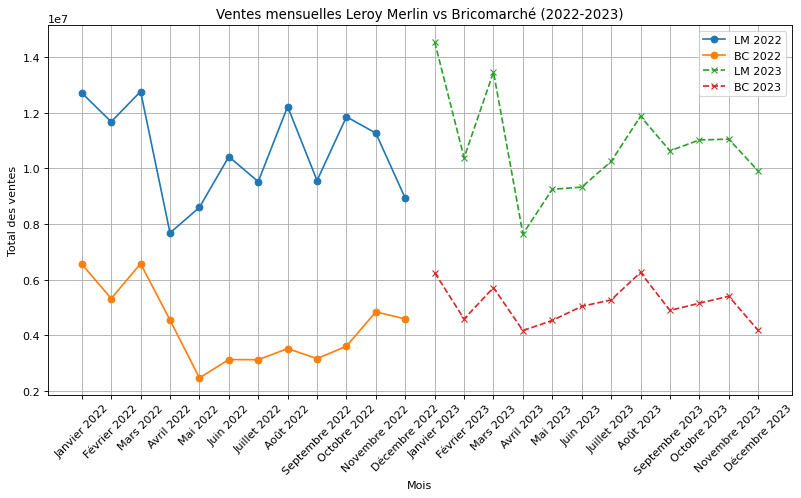

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
br_donnee_brute_merch_22_23=pd.read_csv("brico donnée/Données brutes MERCH 22 23.csv")
br_sales_22_23=pd.read_csv("brico donnée/Données brutes SELL IN 22 23.csv")
br_pp_22_23=pd.read_csv("brico donnée/PP 22 23.csv")
br_visites_annuelles=pd.read_csv("brico donnée/VISITES ANNUELLES 22 23.csv")

lr_pp_23_23=pd.read_csv("leroy merlin /PP 22 23.csv")
lr_sales_22_23=pd.read_csv("leroy merlin /CA SELL IN LM 22 23.csv")
lr_merch_22_23=pd.read_csv("leroy merlin /Données brutes MERCH 22 23.csv")
lr_visites_annuelles=pd.read_csv("leroy merlin /VISITES ANNUELLES 22 23.csv")
# Nettoyer les colonnes pour enlever les sauts de ligne
for df in [lr_sales_22_23, br_sales_22_23]:
    df.columns = df.columns.str.replace(r'\n', ' ')

# Sélectionner les colonnes des ventes mensuelles pour 2022 et 2023
colonnes_2022 = [f"{mois} 2022" for mois in [
    "Janvier", "Février", "Mars", "Avril", "Mai", "Juin",
    "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]]
colonnes_2023 = [f"{mois} 2023" for mois in [
    "Janvier", "Février", "Mars", "Avril", "Mai", "Juin",
    "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]]

# Calculer la somme des ventes mensuelles pour LM et BC
ventes_lm_2022 = lr_sales_22_23[colonnes_2022].sum(axis=0)
ventes_bc_2022 = br_sales_22_23[colonnes_2022].sum(axis=0)

ventes_lm_2023 = lr_sales_22_23[colonnes_2023].sum(axis=0)
ventes_bc_2023 = br_sales_22_23[colonnes_2023].sum(axis=0)

# Visualiser les ventes
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(ventes_lm_2022.index, ventes_lm_2022.values, label='LM 2022', marker='o')
plt.plot(ventes_bc_2022.index, ventes_bc_2022.values, label='BC 2022', marker='o')
plt.plot(ventes_lm_2023.index, ventes_lm_2023.values, label='LM 2023', linestyle='--', marker='x')
plt.plot(ventes_bc_2023.index, ventes_bc_2023.values, label='BC 2023', linestyle='--', marker='x')
plt.legend()
plt.title('Ventes mensuelles Leroy Merlin vs Bricomarché (2022-2023)')
plt.xlabel('Mois')
plt.ylabel('Total des ventes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

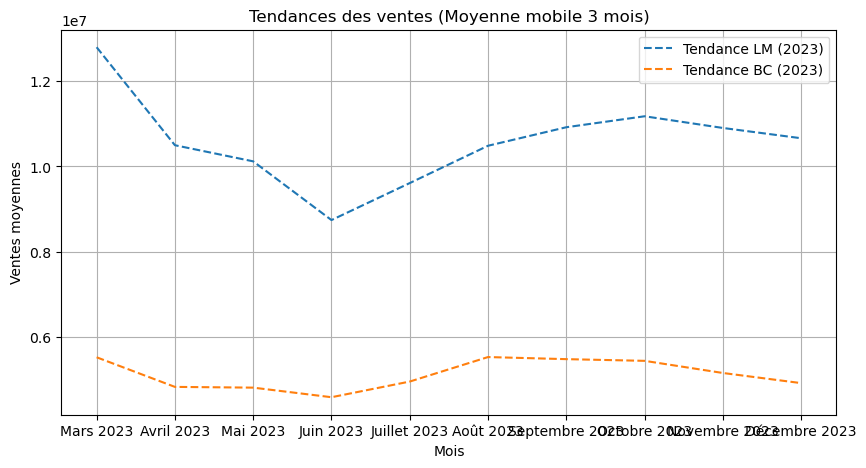

In [6]:
# Moyenne mobile sur 3 mois pour LM et BC
lm_trend = ventes_lm_2023.rolling(window=3).mean()
bc_trend = ventes_bc_2023.rolling(window=3).mean()

# Visualisation
plt.figure(figsize=(10, 5))
plt.plot(lm_trend, label='Tendance LM (2023)', linestyle='--')
plt.plot(bc_trend, label='Tendance BC (2023)', linestyle='--')
plt.title('Tendances des ventes (Moyenne mobile 3 mois)')
plt.xlabel('Mois')
plt.ylabel('Ventes moyennes')
plt.legend()
plt.grid()
plt.show()

In [11]:
# Afficher les colonnes de chaque DataFrame
print("br_donnee_brute_merch_22_23:")
print(br_donnee_brute_merch_22_23.columns)

print("\nbr_sales_22_23:")
print(br_sales_22_23.columns)

print("\nbr_pp_22_23:")
print(br_pp_22_23.columns)

print("\nbr_visites_annuelles:")
print(br_visites_annuelles.columns)

print("\nlr_pp_23_23:")
print(lr_pp_23_23.columns)

print("\nlr_sales_22_23:")
print(lr_sales_22_23.columns)

print("\nlr_merch_22_23:")
print(lr_merch_22_23.columns)

print("\nlr_visites_annuelles:")
print(lr_visites_annuelles.columns)

br_donnee_brute_merch_22_23:
Index(['ANNEE ', 'CODE STATIGEST', 'RAISON SOCIALE', 'CODE POSTAL', 'VILLE',
       'TYPE PARTENARIAT', 'NATURE', 'PASSAGE', 'HEURES', 'BUDGET ESTIMÉ',
       'Code Chef de Secteur Henkel'],
      dtype='object')

br_sales_22_23:
Index(['Code du Point de Vente', 'Raison Sociale', 'Code Postal', 'Ville',
       'Code Chef de Secteur Henkel', 'Total\nFamille', 'Famille',
       'Total\nannuel\n2022', 'Total\nannuel\n2023', 'Total\nannuel\nEvol',
       'Total\nYTD\n2022', 'Total\nYTD\n2023', 'Total\nYTD\nEvol',
       'Janvier\n2022', 'Janvier\n2023', 'Janvier\nEvol', 'Février\n2022',
       'Février\n2023', 'Février\nEvol', 'Mars\n2022', 'Mars\n2023',
       'Mars\nEvol', 'Avril\n2022', 'Avril\n2023', 'Avril\nEvol', 'Mai\n2022',
       'Mai\n2023', 'Mai\nEvol', 'Juin\n2022', 'Juin\n2023', 'Juin\nEvol',
       'Juillet\n2022', 'Juillet\n2023', 'Juillet\nEvol', 'Août\n2022',
       'Août\n2023', 'Août\nEvol', 'Septembre\n2022', 'Septembre\n2023',
       'Septe

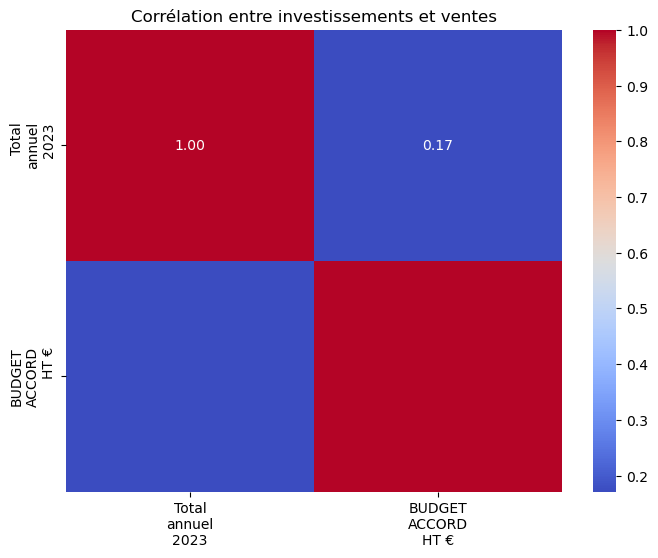

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fusion des données PP et SELL IN
df_corr = br_sales_22_23.merge(
    br_pp_22_23, left_on="Code du Point de Vente", right_on="CODE DU POINT DE VENTE"
)

# Nettoyage de la colonne `BUDGET\nACCORD\nHT €`
df_corr["BUDGET\nACCORD\nHT €"] = (
    df_corr["BUDGET\nACCORD\nHT €"]
    .str.replace("[^0-9,]", "", regex=True)
    .str.replace(",", ".")
    .astype(float)
)

# Calcul de la corrélation
corr_matrix = df_corr[["Total\nannuel\n2023", "BUDGET\nACCORD\nHT €"]].corr()

# Visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre investissements et ventes")
plt.show()

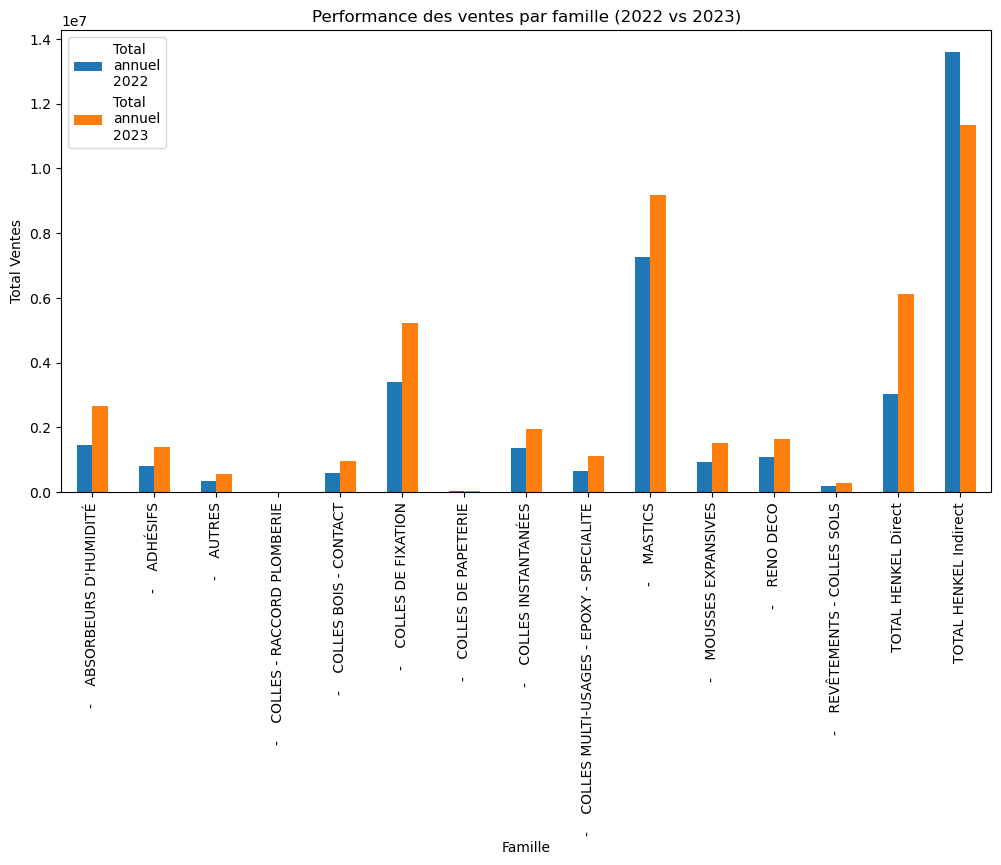

In [18]:
# Agrégation des ventes par famille
famille_performance = br_sales_22_23.groupby("Famille").agg({
    "Total\nannuel\n2022": "sum",
    "Total\nannuel\n2023": "sum"
}).reset_index()

# Visualisation
famille_performance.set_index("Famille").plot(
    kind='bar', figsize=(12, 6), title="Performance des ventes par famille (2022 vs 2023)"
)
plt.ylabel("Total Ventes")
plt.show()

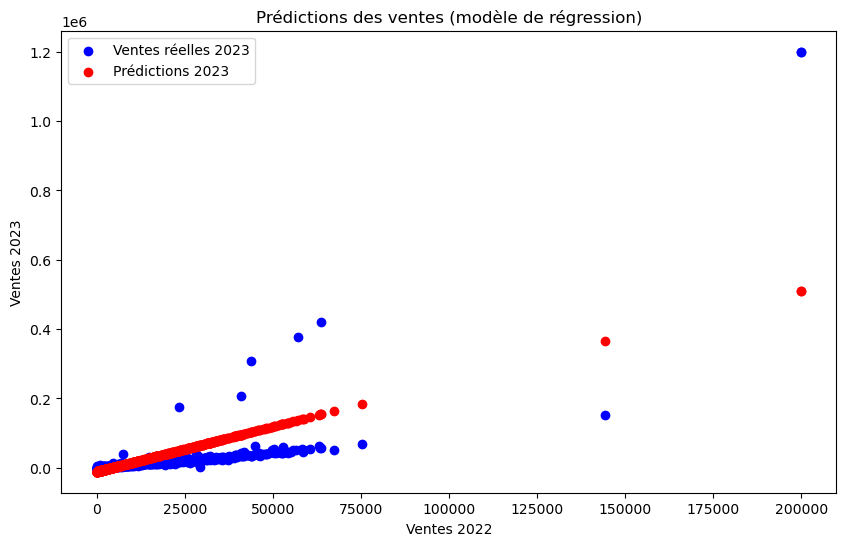

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Nettoyage des données : Suppression des lignes avec NaN et alignement des indices
X_clean = br_sales_22_23[["Total\nannuel\n2022"]].dropna()
y_clean = br_sales_22_23["Total\nannuel\n2023"].dropna()

# Alignement des index
X_clean = X_clean.loc[X_clean.index.intersection(y_clean.index)]
y_clean = y_clean.loc[y_clean.index.intersection(X_clean.index)]

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Modèle de régression linéaire
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Prédictions
y_pred = reg_model.predict(X_test)

# Visualisation des prédictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Ventes réelles 2023')
plt.scatter(X_test, y_pred, color='red', label='Prédictions 2023')
plt.title("Prédictions des ventes (modèle de régression)")
plt.xlabel("Ventes 2022")
plt.ylabel("Ventes 2023")
plt.legend()
plt.show()

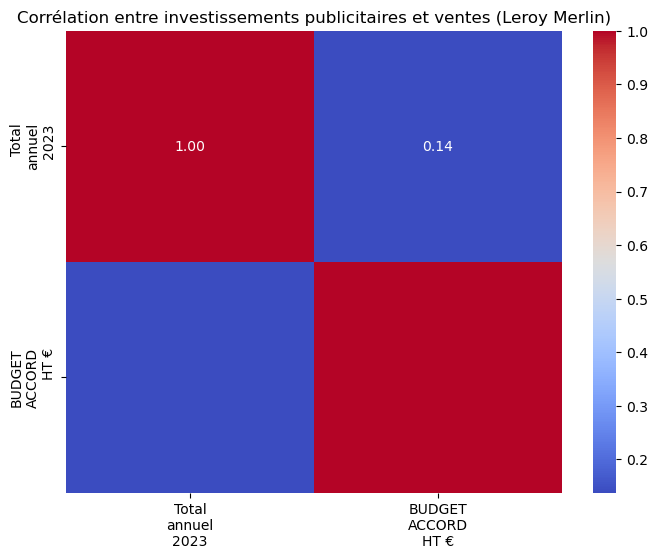

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fusion des données de ventes et de publicité
df_corr_lr = lr_sales_22_23.merge(
    lr_pp_23_23, left_on="Code du Point de Vente", right_on="CODE DU POINT DE VENTE"
)

# Nettoyage des colonnes pertinentes
df_corr_lr["BUDGET\nACCORD\nHT €"] = (
    df_corr_lr["BUDGET\nACCORD\nHT €"]
    .str.replace("[^0-9,]", "", regex=True)
    .str.replace(",", ".")
    .astype(float)
)

# Calcul de la corrélation
corr_matrix_lr = df_corr_lr[["Total\nannuel\n2023", "BUDGET\nACCORD\nHT €"]].corr()

# Visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_lr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre investissements publicitaires et ventes (Leroy Merlin)")
plt.show()

/Users/matthieurubio/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


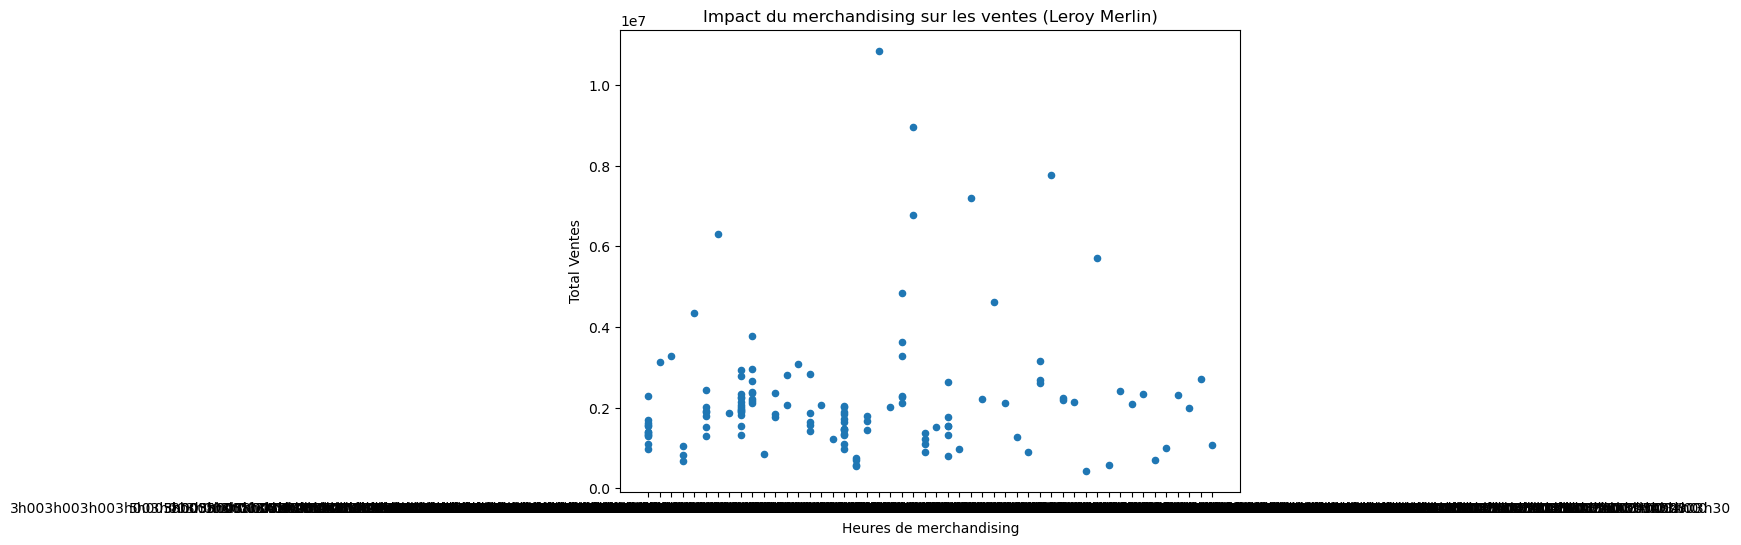

In [25]:
# Fusion des données de merchandising et de ventes
df_merch_lr = lr_merch_22_23.merge(
    lr_sales_22_23, left_on="CODE STATIGEST", right_on="Code du Point de Vente"
)

# Agrégation des heures et des ventes par point de vente
merch_analysis_lr = df_merch_lr.groupby("RAISON SOCIALE").agg({
    "HEURES": "sum",
    "Total\nannuel\n2023": "sum"
}).reset_index()

# Visualisation
merch_analysis_lr.plot(
    kind='scatter', x='HEURES', y='Total\nannuel\n2023', figsize=(8, 6),
    title="Impact du merchandising sur les ventes (Leroy Merlin)"
)
plt.xlabel("Heures de merchandising")
plt.ylabel("Total Ventes")
plt.show()

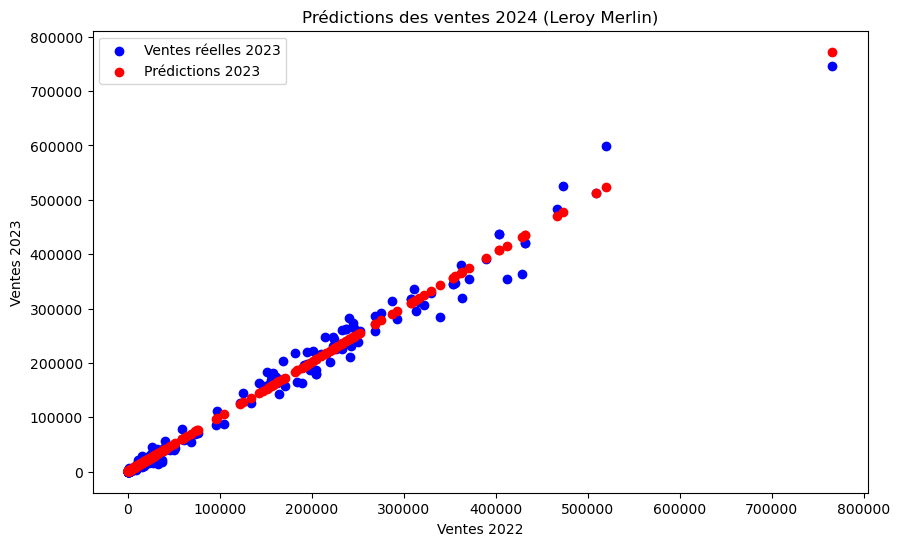

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Préparation des données
X_lr = lr_sales_22_23[["Total\nannuel\n2022"]].dropna()
y_lr = lr_sales_22_23["Total\nannuel\n2023"].dropna()

# Alignement des index
X_lr = X_lr.loc[X_lr.index.intersection(y_lr.index)]
y_lr = y_lr.loc[y_lr.index.intersection(X_lr.index)]

# Séparation en ensembles d'entraînement et de test
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Modèle de régression
reg_model_lr = LinearRegression()
reg_model_lr.fit(X_train_lr, y_train_lr)

# Prédictions
y_pred_lr = reg_model_lr.predict(X_test_lr)

# Visualisation des prédictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test_lr, y_test_lr, color='blue', label='Ventes réelles 2023')
plt.scatter(X_test_lr, y_pred_lr, color='red', label='Prédictions 2023')
plt.title("Prédictions des ventes 2024 (Leroy Merlin)")
plt.xlabel("Ventes 2022")
plt.ylabel("Ventes 2023")
plt.legend()
plt.show()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrégation des ventes par produit, magasin et région
product_sales = lr_sales_22_23.groupby("Famille").agg({
    "Total\nannuel\n2023": "sum"
}).reset_index()

store_sales = lr_sales_22_23.groupby("Raison Sociale").agg({
    "Total\nannuel\n2023": "sum"
}).reset_index()

region_sales = lr_sales_22_23.groupby("Code Postal").agg({
    "Total\nannuel\n2023": "sum"
}).reset_index()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrégation des ventes par produit, magasin et région
product_sales_br = br_sales_22_23.groupby("Famille").agg({
    "Total\nannuel\n2023": "sum"
}).reset_index()

store_sales_br = br_sales_22_23.groupby("Raison Sociale").agg({
    "Total\nannuel\n2023": "sum"
}).reset_index()

region_sales_br = br_sales_22_23.groupby("Code Postal").agg({
    "Total\nannuel\n2023": "sum"
}).reset_index()

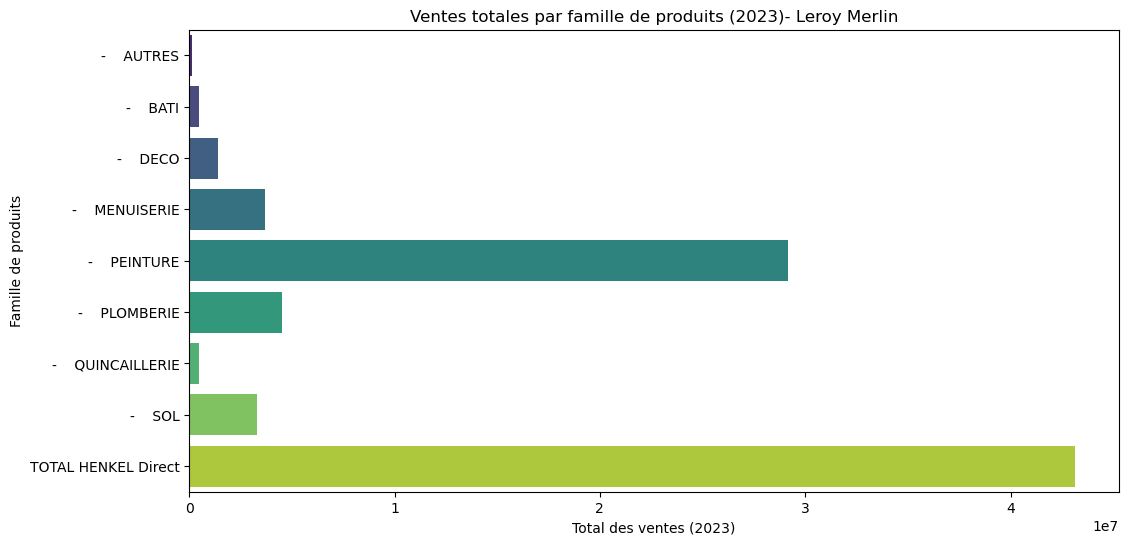

In [44]:
# Visualisation des ventes par produit
plt.figure(figsize=(12, 6))
sns.barplot(x="Total\nannuel\n2023", y="Famille", data=product_sales, palette="viridis")
plt.title("Ventes totales par famille de produits (2023)- Leroy Merlin")
plt.xlabel("Total des ventes (2023)")
plt.ylabel("Famille de produits")
plt.show()

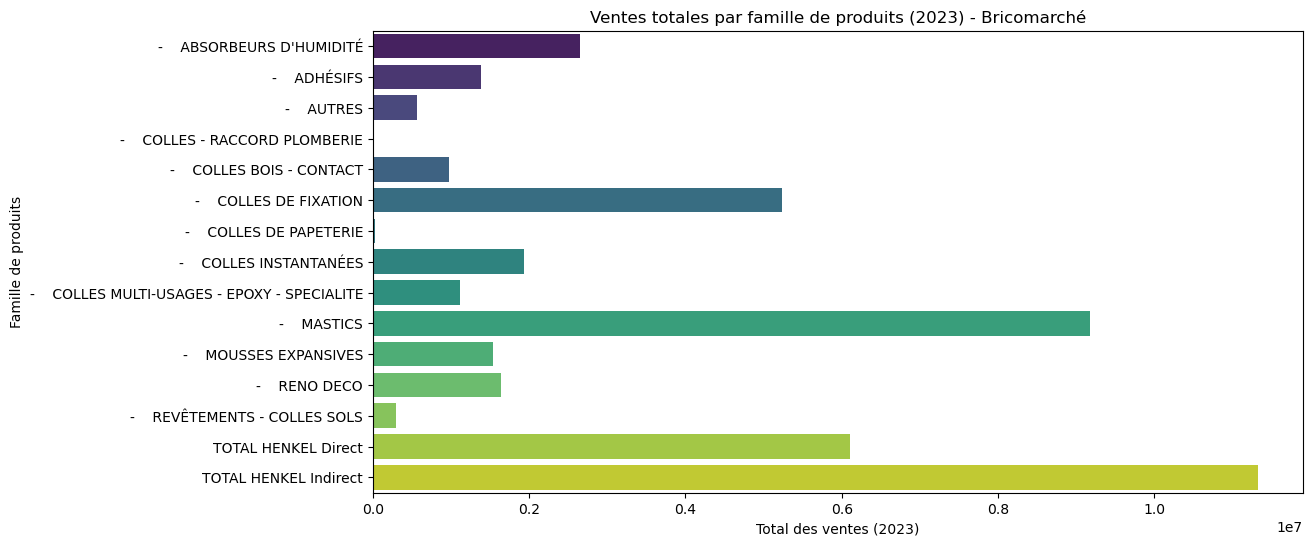

In [33]:
# Visualisation des ventes par produit
plt.figure(figsize=(12, 6))
sns.barplot(x="Total\nannuel\n2023", y="Famille", data=product_sales_br, palette="viridis")
plt.title("Ventes totales par famille de produits (2023) - Bricomarché")
plt.xlabel("Total des ventes (2023)")
plt.ylabel("Famille de produits")
plt.show()

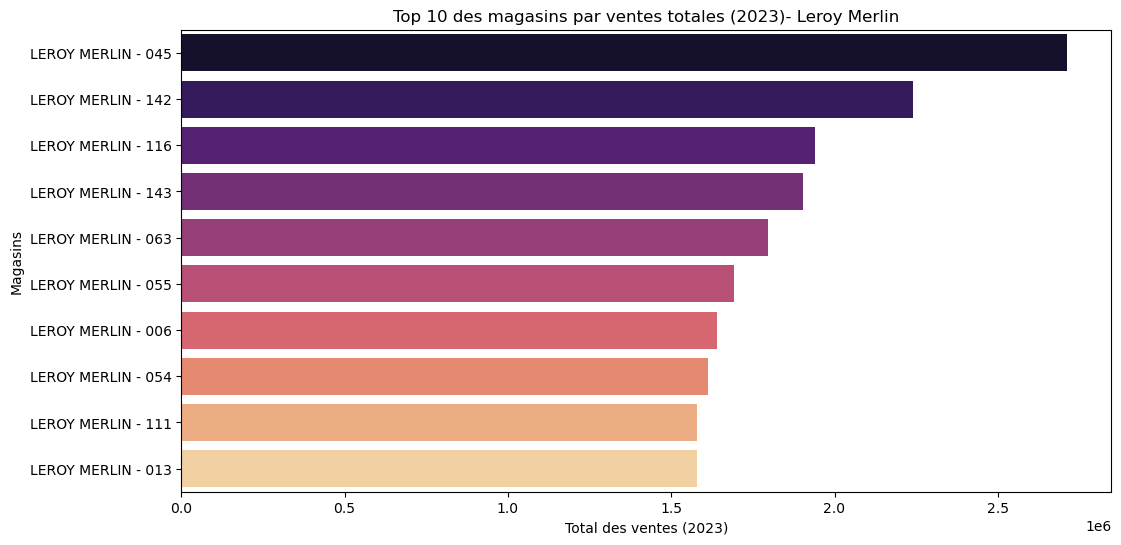

In [43]:
# Visualisation des ventes par magasin
plt.figure(figsize=(12, 6))
store_sales_sorted = store_sales.sort_values(by="Total\nannuel\n2023", ascending=False).head(10)  # Top 10 magasins
sns.barplot(x="Total\nannuel\n2023", y="Raison Sociale", data=store_sales_sorted, palette="magma")
plt.title("Top 10 des magasins par ventes totales (2023)- Leroy Merlin")
plt.xlabel("Total des ventes (2023)")
plt.ylabel("Magasins")
plt.show()

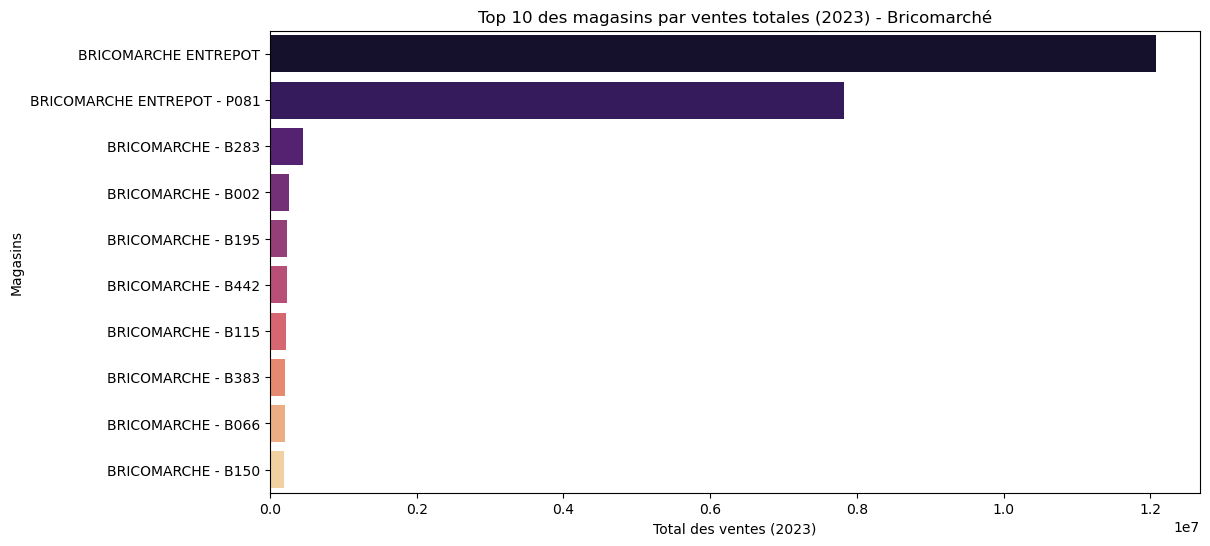

In [34]:
# Visualisation des ventes par magasin
plt.figure(figsize=(12, 6))
store_sales_br_sorted = store_sales_br.sort_values(by="Total\nannuel\n2023", ascending=False).head(10)  # Top 10 magasins
sns.barplot(x="Total\nannuel\n2023", y="Raison Sociale", data=store_sales_br_sorted, palette="magma")
plt.title("Top 10 des magasins par ventes totales (2023) - Bricomarché")
plt.xlabel("Total des ventes (2023)")
plt.ylabel("Magasins")
plt.show()

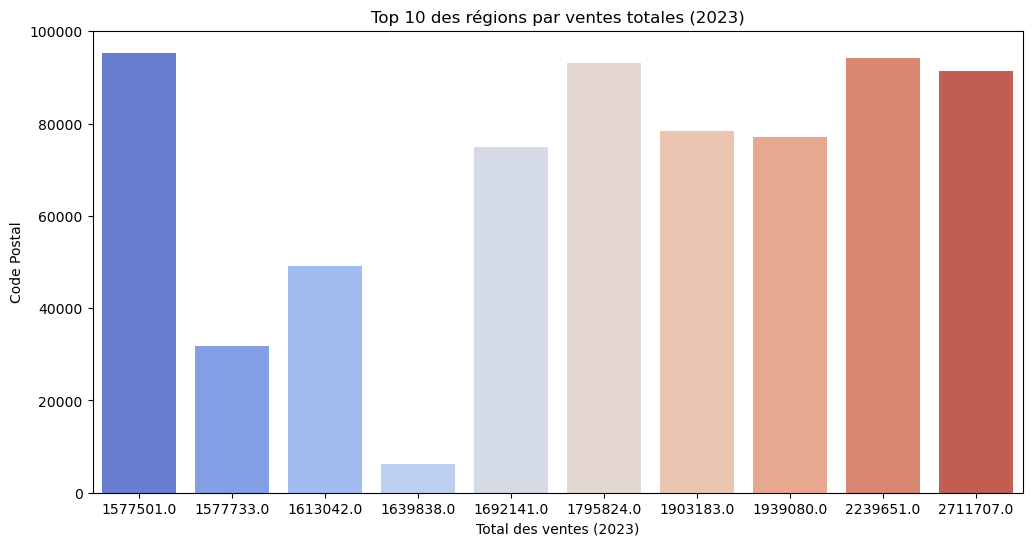

In [30]:
# Visualisation des ventes par région
plt.figure(figsize=(12, 6))
region_sales_sorted = region_sales.sort_values(by="Total\nannuel\n2023", ascending=False).head(10)  # Top 10 régions
sns.barplot(x="Total\nannuel\n2023", y="Code Postal", data=region_sales_sorted, palette="coolwarm")
plt.title("Top 10 des régions par ventes totales (2023)")
plt.xlabel("Total des ventes (2023)")
plt.ylabel("Code Postal")
plt.show()

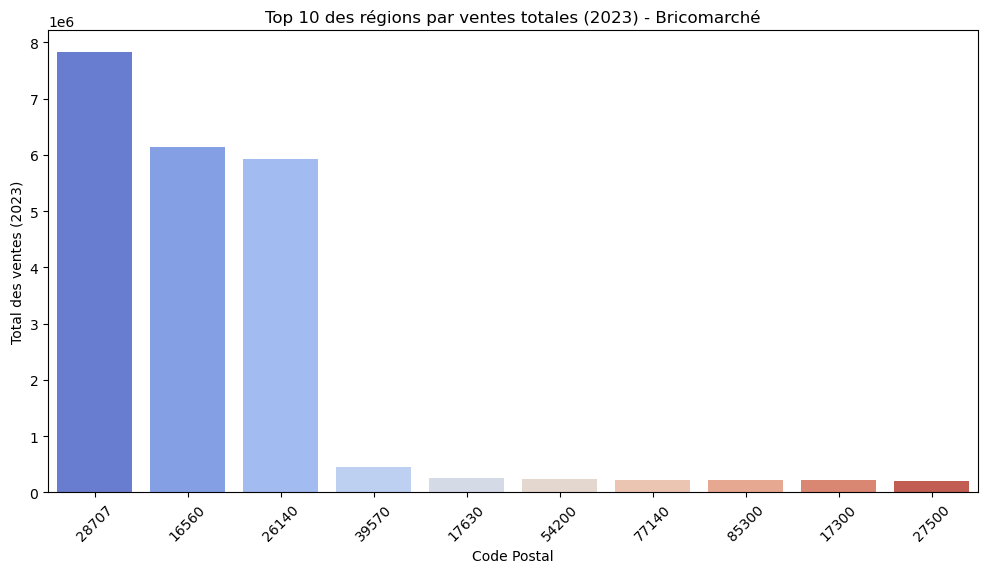

In [38]:
# Tri des données par ventes totales en ordre décroissant
region_sales_br_sorted = region_sales_br.sort_values(by="Total\nannuel\n2023", ascending=False).head(10)

# Graphique avec tri décroissant
plt.figure(figsize=(12, 6))
sns.barplot(x="Code Postal", y="Total\nannuel\n2023", data=region_sales_br_sorted, palette="coolwarm", order=region_sales_br_sorted["Code Postal"])
plt.title("Top 10 des régions par ventes totales (2023) - Bricomarché")
plt.xlabel("Code Postal")
plt.ylabel("Total des ventes (2023)")
plt.xticks(rotation=45)  # Rotation pour une meilleure lisibilité
plt.show()

In [45]:
# Fusion des données de ventes, publicité, merchandising, et visites
lr_combined = lr_sales_22_23.merge(
    lr_pp_23_23, left_on="Code du Point de Vente", right_on="CODE DU POINT DE VENTE"
).merge(
    lr_merch_22_23, left_on="Code du Point de Vente", right_on="CODE STATIGEST"
).merge(
    lr_visites_annuelles, left_on="Code du Point de Vente", right_on="CODE INTERNE UNIQUE DU POINT DE VENTE"
)

# Sélection et nettoyage des colonnes nécessaires
lr_combined["BUDGET\nACCORD\nHT €"] = (
    lr_combined["BUDGET\nACCORD\nHT €"]
    .str.replace("[^0-9,]", "", regex=True)
    .str.replace(",", ".")
    .astype(float)
)
lr_combined = lr_combined[[
    "Total\nannuel\n2023", "BUDGET\nACCORD\nHT €", "HEURES", "Total visites annuelles\n2023"
]].dropna()

In [46]:
# Fusion des données de ventes, publicité, merchandising, et visites
br_combined = br_sales_22_23.merge(
    br_pp_22_23, left_on="Code du Point de Vente", right_on="CODE DU POINT DE VENTE"
).merge(
    br_donnee_brute_merch_22_23, left_on="Code du Point de Vente", right_on="CODE STATIGEST"
).merge(
    br_visites_annuelles, left_on="Code du Point de Vente", right_on="CODE INTERNE UNIQUE DU POINT DE VENTE"
)

# Sélection et nettoyage des colonnes nécessaires
br_combined["BUDGET\nACCORD\nHT €"] = (
    br_combined["BUDGET\nACCORD\nHT €"]
    .str.replace("[^0-9,]", "", regex=True)
    .str.replace(",", ".")
    .astype(float)
)
br_combined = br_combined[[
    "Total\nannuel\n2023", "BUDGET\nACCORD\nHT €", "HEURES", "Total visites annuelles\n2023"
]].dropna()

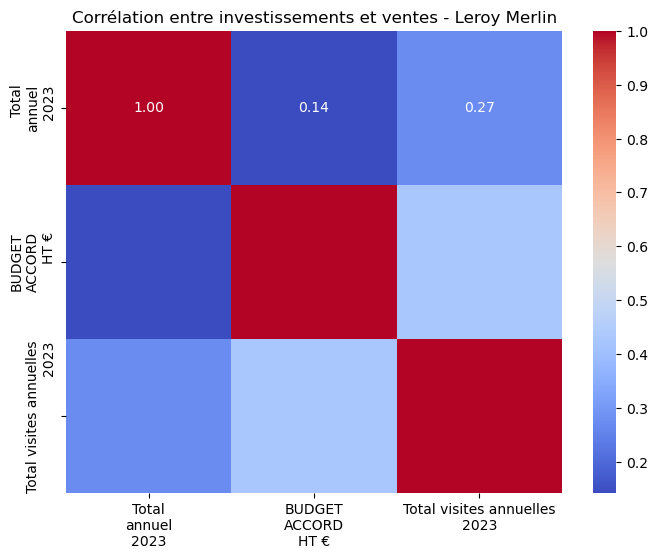

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
lr_corr_matrix = lr_combined.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(lr_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre investissements et ventes - Leroy Merlin")
plt.show()

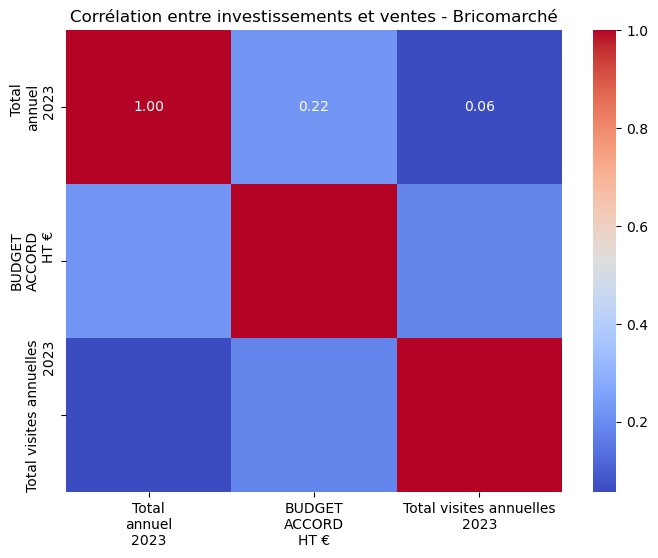

In [48]:
# Calcul de la matrice de corrélation
br_corr_matrix = br_combined.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(br_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre investissements et ventes - Bricomarché")
plt.show()

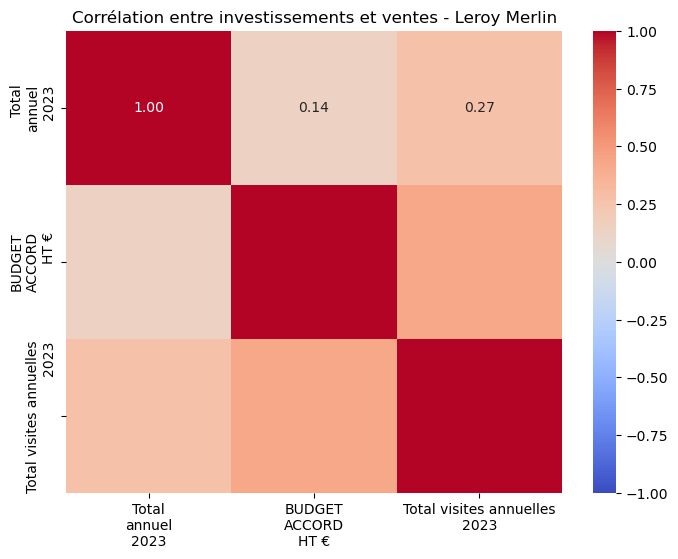

In [49]:
# Visualisation avec une échelle corrigée (pour des couleurs cohérentes)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Corrélation entre investissements et ventes - Leroy Merlin")
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Préparation des données de clustering pour Leroy Merlin
lr_clustering_data = lr_sales_22_23.merge(
    lr_pp_23_23, left_on="Code du Point de Vente", right_on="CODE DU POINT DE VENTE"
).merge(
    lr_visites_annuelles, left_on="Code du Point de Vente", right_on="CODE INTERNE UNIQUE DU POINT DE VENTE"
)

# Nettoyage des colonnes nécessaires pour le clustering
lr_clustering_data["BUDGET\nACCORD\nHT €"] = (
    lr_clustering_data["BUDGET\nACCORD\nHT €"]
    .str.replace("[^0-9,]", "", regex=True)
    .str.replace(",", ".")
    .astype(float)
)
lr_clustering_data = lr_clustering_data[[
    "Total\nannuel\n2023", "Total visites annuelles\n2023", "BUDGET\nACCORD\nHT €"
]].dropna()

# Standardisation des données
scaler = StandardScaler()
lr_scaled_data = scaler.fit_transform(lr_clustering_data)

In [56]:
pip install --upgrade --force-reinstall numpy scikit-learn

  Using cached scipy-1.14.1-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 358.5 kB/s eta 0:00:0000:0100:02
Using cached scipy-1.14.1-cp311-cp311-macosx_14_0_arm64.whl (23.1 MB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.2
    Uninstalling numpy-1.23.2:
      Successfully uninstalled numpy-1.23.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: scikit-learn
    F

In [57]:
conda install numpy scikit-learn --force-reinstall

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/matthieurubio/anaconda3

  added / updated specs:
    - numpy
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    archspec-0.2.3             |     pyhd3eb1b0_0          47 KB
    ca-certificates-2024.9.24  |       hca03da5_0         131 KB
    certifi-2024.8.30          |  py311hca03da5_0         165 KB
    conda-24.11.0              |  py311hca03da5_0         1.2 MB
    frozendict-2.4.2           |  py311hca03da5_0          38 KB
    numpy-1.26.4               |  py311he598dae_0          12 KB
    numpy-base-1.26.4          |  py311hfbfe69c_0         6.9 MB
    openssl-3.0.15             |       h80987f9_0         4.3 MB
    scikit-learn-1.5.1         |  py311h7aedaa7_0         9.8 MB
    threadpoolctl-3.5.0      

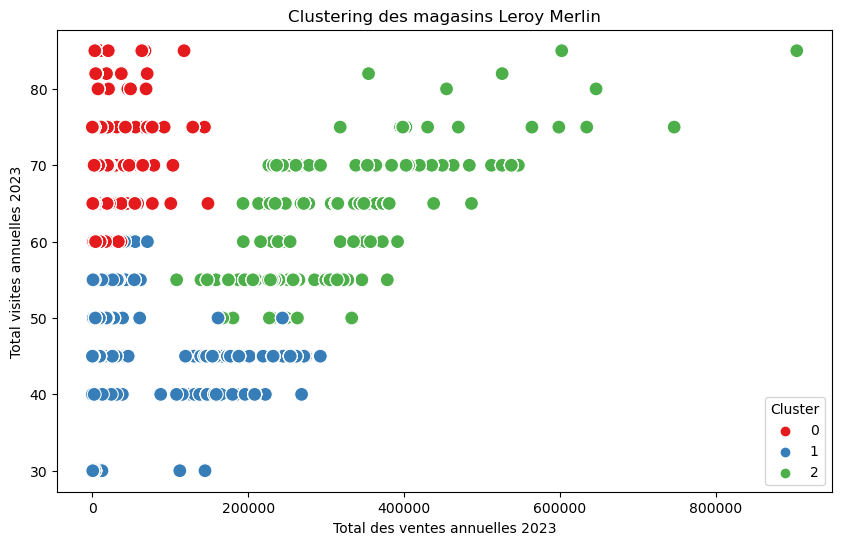

In [59]:
from sklearn.cluster import AgglomerativeClustering

# Clustering avec AgglomerativeClustering
agglo_clustering = AgglomerativeClustering(n_clusters=3)
lr_clustering_data["Cluster"] = agglo_clustering.fit_predict(lr_scaled_data)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=lr_clustering_data["Total\nannuel\n2023"],
    y=lr_clustering_data["Total visites annuelles\n2023"],
    hue=lr_clustering_data["Cluster"],
    palette="Set1",
    s=100
)
plt.title("Clustering des magasins Leroy Merlin")
plt.xlabel("Total des ventes annuelles 2023")
plt.ylabel("Total visites annuelles 2023")
plt.legend(title="Cluster")
plt.show()

In [74]:
lr_clustering_data.columns

Index(['Total\nannuel\n2023', 'Total visites annuelles\n2023',
       'BUDGET\nACCORD\nHT €', 'Cluster'],
      dtype='object')

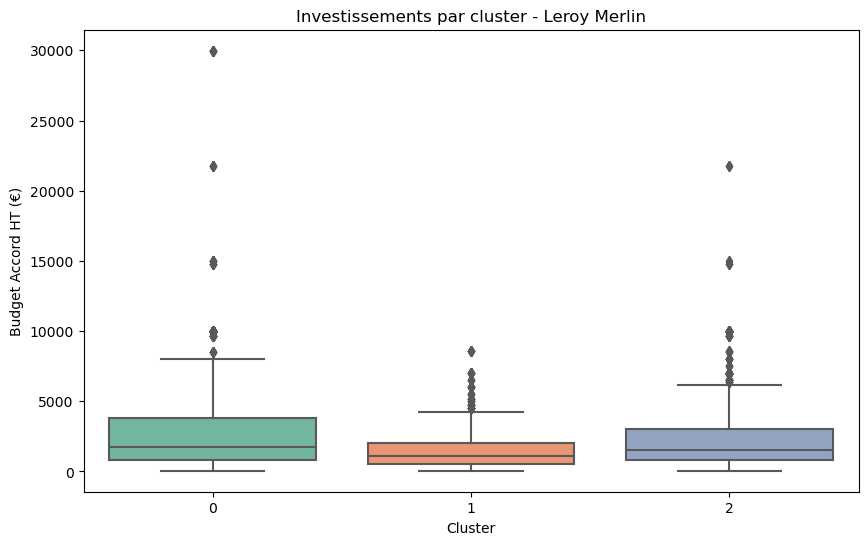

In [75]:
# Nettoyage des noms de colonnes pour éviter les erreurs
lr_clustering_data.columns = lr_clustering_data.columns.str.strip()  # Suppression des espaces inutiles

# Renommage pour simplifier les colonnes contenant des sauts de ligne
lr_clustering_data.rename(columns={
    'Total\nannuel\n2023': 'Total_annuel_2023',
    'Total visites annuelles\n2023': 'Total_visites_annuelles_2023',
    'BUDGET\nACCORD\nHT €': 'Budget_Accord_HT'
}, inplace=True)

# Conversion en numérique si nécessaire
lr_clustering_data["Budget_Accord_HT"] = pd.to_numeric(lr_clustering_data["Budget_Accord_HT"], errors="coerce")

# Visualisation des investissements par cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Budget_Accord_HT", data=lr_clustering_data, palette="Set2")
plt.title("Investissements par cluster - Leroy Merlin")
plt.xlabel("Cluster")
plt.ylabel("Budget Accord HT (€)")
plt.show()

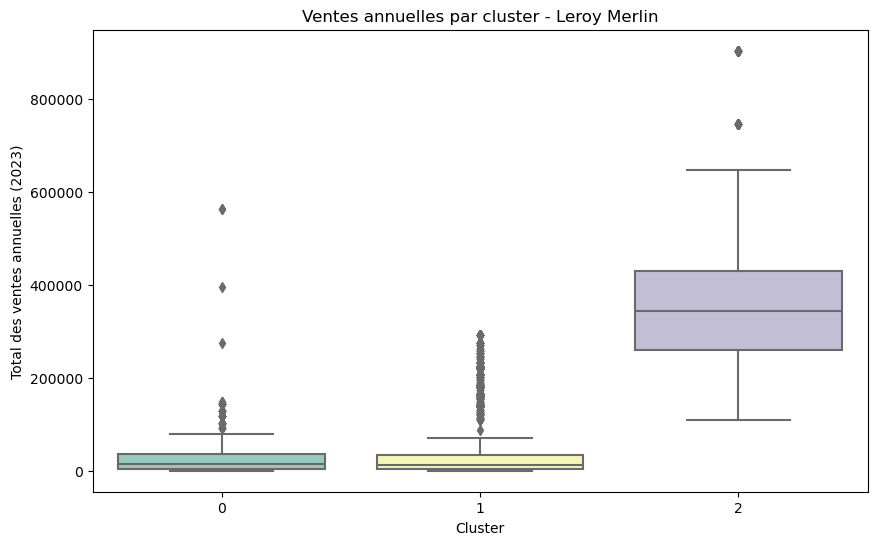

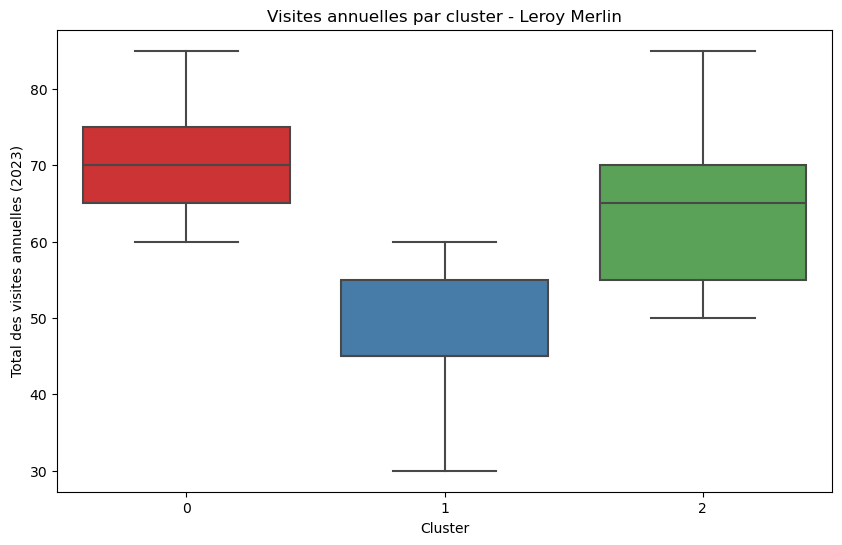

In [76]:
# Comparaison des ventes annuelles par cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Total_annuel_2023", data=lr_clustering_data, palette="Set3")
plt.title("Ventes annuelles par cluster - Leroy Merlin")
plt.xlabel("Cluster")
plt.ylabel("Total des ventes annuelles (2023)")
plt.show()

# Comparaison des visites annuelles par cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Total_visites_annuelles_2023", data=lr_clustering_data, palette="Set1")
plt.title("Visites annuelles par cluster - Leroy Merlin")
plt.xlabel("Cluster")
plt.ylabel("Total des visites annuelles (2023)")
plt.show()

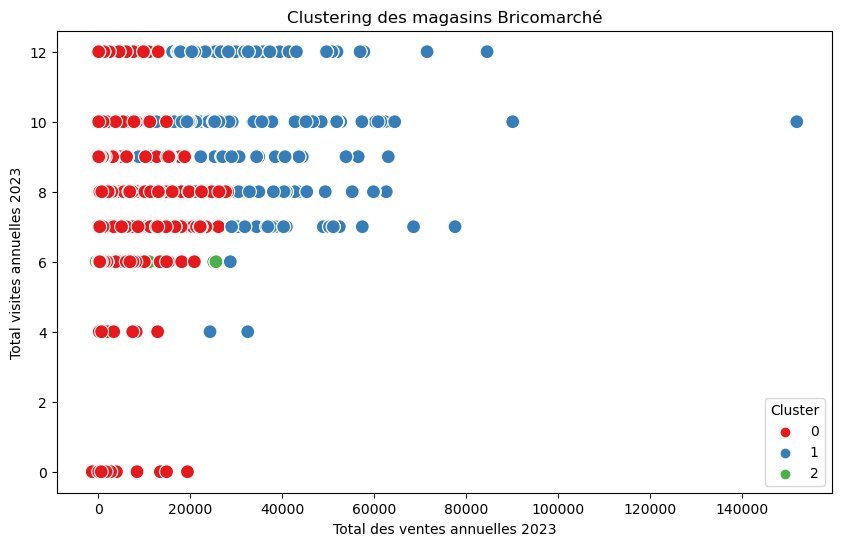

In [66]:
# Application de AgglomerativeClustering pour Bricomarché
agglo_clustering_br = AgglomerativeClustering(n_clusters=3)
br_clustering_data["Cluster"] = agglo_clustering_br.fit_predict(br_scaled_data)

# Visualisation des clusters pour Bricomarché
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=br_clustering_data["Total\nannuel\n2023"],
    y=br_clustering_data["Total visites annuelles\n2023"],
    hue=br_clustering_data["Cluster"],
    palette="Set1",
    s=100
)
plt.title("Clustering des magasins Bricomarché")
plt.xlabel("Total des ventes annuelles 2023")
plt.ylabel("Total visites annuelles 2023")
plt.legend(title="Cluster")
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Préparation des données pour Leroy Merlin
lr_projection_data = lr_sales_22_23.merge(
    lr_pp_23_23, left_on="Code du Point de Vente", right_on="CODE DU POINT DE VENTE"
).merge(
    lr_visites_annuelles, left_on="Code du Point de Vente", right_on="CODE INTERNE UNIQUE DU POINT DE VENTE"
)

# Nettoyage des données
lr_projection_data["BUDGET\nACCORD\nHT €"] = (
    lr_projection_data["BUDGET\nACCORD\nHT €"]
    .str.replace("[^0-9,]", "", regex=True)
    .str.replace(",", ".")
    .astype(float)
)

# Sélection des variables pertinentes
lr_projection_data = lr_projection_data[[
    "Total\nannuel\n2023", "BUDGET\nACCORD\nHT €", "Total visites annuelles\n2023"
]].dropna()

# Variables indépendantes et dépendantes
X = lr_projection_data[["BUDGET\nACCORD\nHT €", "Total visites annuelles\n2023"]]
y = lr_projection_data["Total\nannuel\n2023"]

# Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Entraînement du modèle
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Prédictions
y_pred = reg_model.predict(X_test)

# Évaluation du modèle
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Erreur quadratique moyenne (RMSE) : {rmse}")

# Coefficients du modèle
print(f"Coefficients : {reg_model.coef_}")
print(f"Intercept : {reg_model.intercept_}")

Erreur quadratique moyenne (RMSE) : 156037.5155128647
Coefficients : [3.03963657e+00 3.12174644e+03]
Intercept : -81894.74824992637


In [69]:
# Simulation de nouveaux investissements et visites
new_scenarios = pd.DataFrame({
    "BUDGET\nACCORD\nHT €": [50000, 100000, 150000],
    "Total visites annuelles\n2023": [50, 70, 90]
})

# Prédictions basées sur les scénarios
new_predictions = reg_model.predict(new_scenarios)

# Affichage des résultats
for i, prediction in enumerate(new_predictions):
    print(f"Scénario {i+1} : Prédiction des ventes = {prediction}")

Scénario 1 : Prédiction des ventes = 226174.4021433186
Scénario 2 : Prédiction des ventes = 440591.1593095926
Scénario 3 : Prédiction des ventes = 655007.9164758666


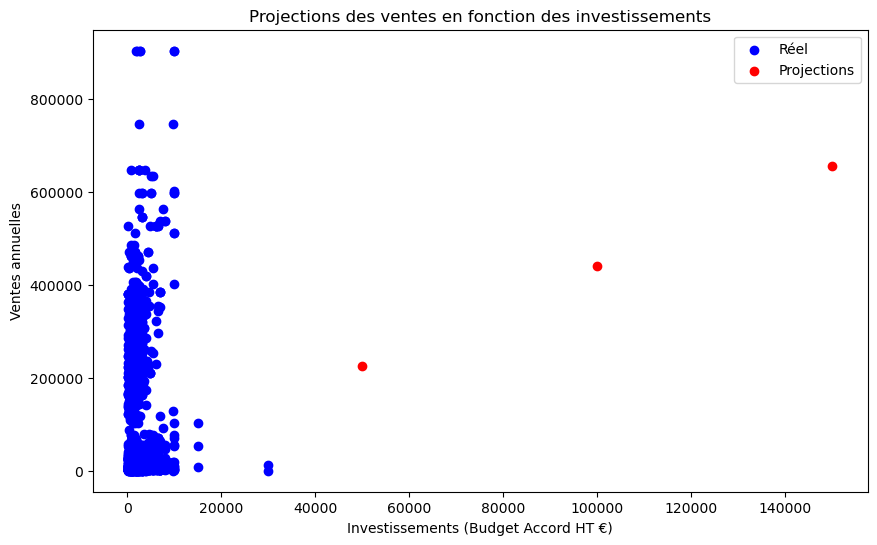

In [70]:
import matplotlib.pyplot as plt

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(X_test["BUDGET\nACCORD\nHT €"], y_test, color="blue", label="Réel")
plt.scatter(new_scenarios["BUDGET\nACCORD\nHT €"], new_predictions, color="red", label="Projections")
plt.xlabel("Investissements (Budget Accord HT €)")
plt.ylabel("Ventes annuelles")
plt.title("Projections des ventes en fonction des investissements")
plt.legend()
plt.show()

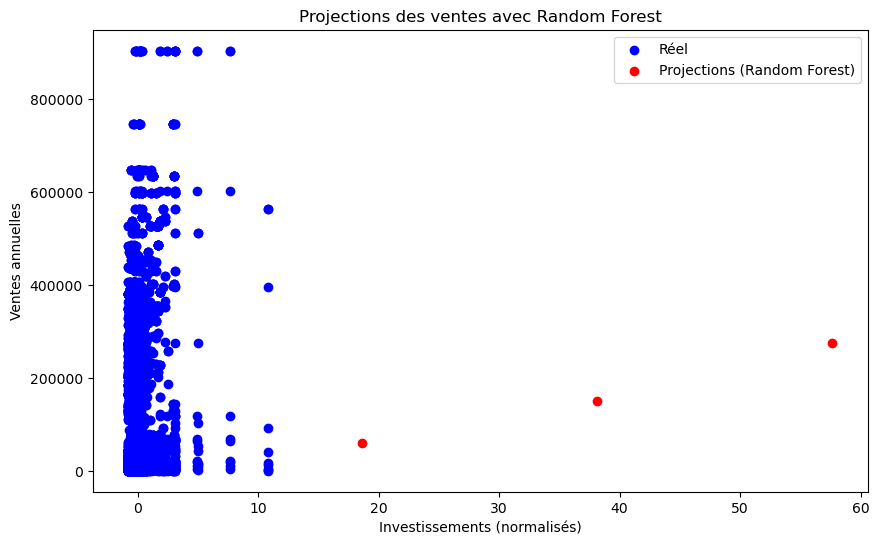

Scénario 1 : Prédiction des ventes (Random Forest) = 59864.806333854336
Scénario 2 : Prédiction des ventes (Random Forest) = 150940.20486335582
Scénario 3 : Prédiction des ventes (Random Forest) = 273867.9310594245


In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Transformation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ré-entraînement avec Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)

# Prédictions sur de nouveaux scénarios
new_scenarios_scaled = scaler.transform(new_scenarios)
new_predictions_rf = rf_model.predict(new_scenarios_scaled)

# Visualisation améliorée
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], y, color="blue", label="Réel")
plt.scatter(new_scenarios_scaled[:, 0], new_predictions_rf, color="red", label="Projections (Random Forest)")
plt.xlabel("Investissements (normalisés)")
plt.ylabel("Ventes annuelles")
plt.title("Projections des ventes avec Random Forest")
plt.legend()
plt.show()

# Résultats des prédictions
for i, prediction in enumerate(new_predictions_rf):
    print(f"Scénario {i+1} : Prédiction des ventes (Random Forest) = {prediction}")

In [78]:
from sklearn.linear_model import LinearRegression

# Variables explicatives : Budget et visites
X = lr_clustering_data[["Budget_Accord_HT", "Total_visites_annuelles_2023"]]
y = lr_clustering_data["Total_annuel_2023"]

# Régression linéaire
reg_model = LinearRegression()
reg_model.fit(X, y)

# Importance des variables
print("Coefficients : ", reg_model.coef_)
print("Intercept : ", reg_model.intercept_)

Coefficients :  [2.60720716e+00 3.10426772e+03]
Intercept :  -79247.51448729218


In [82]:
postal_codes=pd.read_csv("019HexaSmal.csv",sep=";")

In [84]:
postal_codes.columns


Index(['Code_commune_INSEE', 'Nom_de_la_commune', 'Code_postal',
       'Libell�_d_acheminement', 'Ligne_5'],
      dtype='object')

In [85]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [87]:
lr_clustering_data

,Total_annuel_2023,Total_visites_annuelles_2023,Budget_Accord_HT,Cluster
0,241343.0,45,2000.0,1
1,241343.0,45,350.0,1
2,241343.0,45,1800.0,1
3,241343.0,45,2000.0,1
4,241343.0,45,350.0,1
...,...,...,...,...
6518,38600.0,40,300.0,1
6519,31211.0,40,300.0,1
6520,24328.0,40,300.0,1
6521,12954.0,40,300.0,1


In [92]:
lr_clustering_data.columns = lr_clustering_data.columns.str.replace("\n", " ").str.strip()
print(lr_clustering_data.columns)

Index(['Total_annuel_2023', 'Total_visites_annuelles_2023', 'Budget_Accord_HT',
       'Cluster'],
      dtype='object')


In [93]:
if "BUDGET ACCORD HT €" in lr_clustering_data.columns:
    print("Colonne présente.")
else:
    print("Colonne manquante.")

Colonne manquante.


In [94]:
lr_clustering_data

,Total_annuel_2023,Total_visites_annuelles_2023,Budget_Accord_HT,Cluster
0,241343.0,45,2000.0,1
1,241343.0,45,350.0,1
2,241343.0,45,1800.0,1
3,241343.0,45,2000.0,1
4,241343.0,45,350.0,1
...,...,...,...,...
6518,38600.0,40,300.0,1
6519,31211.0,40,300.0,1
6520,24328.0,40,300.0,1
6521,12954.0,40,300.0,1


Index(['Total_annuel_2023', 'Total_visites_annuelles_2023', 'Budget_Accord_HT',
       'Cluster'],
      dtype='object')


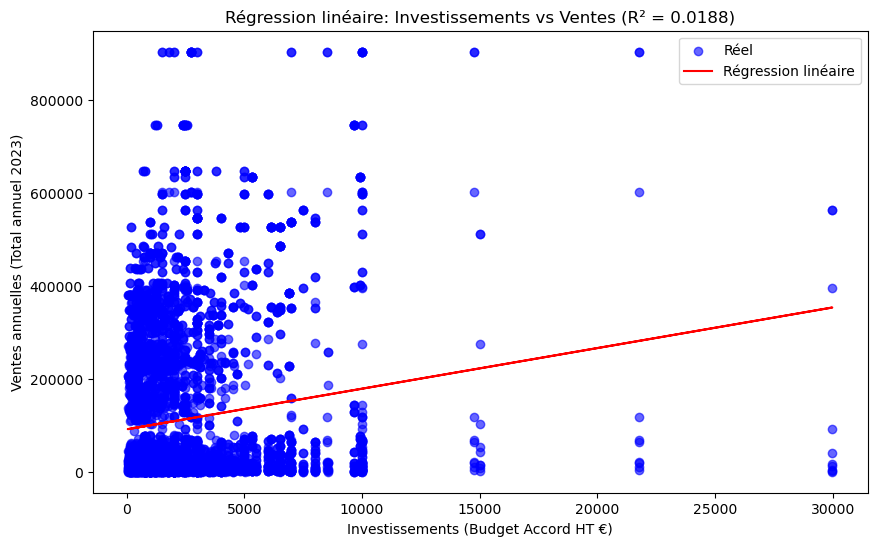

R² : 0.0188
Coefficient: 8.75
Intercept: 91153.11


In [101]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Nettoyage des noms de colonnes
lr_clustering_data.columns = lr_clustering_data.columns.str.replace("\n", " ").str.strip()

# Vérification des colonnes
print(lr_clustering_data.columns)

# Préparation des données
X = lr_clustering_data[["Budget_Accord_HT"]].fillna(0)
y = lr_clustering_data["Total_annuel_2023"]

# Modèle de régression linéaire
reg = LinearRegression()
reg.fit(X, y)

# Prédictions
y_pred = reg.predict(X)

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Réel", alpha=0.6)
plt.plot(X, y_pred, color="red", label="Régression linéaire")
plt.title(f"Régression linéaire: Investissements vs Ventes (R² = {r2:.4f})")
plt.xlabel("Investissements (Budget Accord HT €)")
plt.ylabel("Ventes annuelles (Total annuel 2023)")
plt.legend()
plt.show()
# Calcul du R²
r2 = r2_score(y, y_pred)
print(f"R² : {r2:.4f}")
# Affichage des coefficients
print(f"Coefficient: {reg.coef_[0]:.2f}")
print(f"Intercept: {reg.intercept_:.2f}")